# **Borrowing of strength in Bayesian hierarchical model**

BAYESIAN INFERENCE I EXAM - TSDS - SISSA - 2025

Cristopher Erazo

# Description of the Problem


The problem is to estimate the average number of admissions per day from various hospitals in a city. The data we are given is the number of admissions per day for each hospital, but the complication arises because different hospitals might have different reporting frequencies. Due to this fact, the estimations of the hospitals with less samples will be more uncertain if we treat each hospital independently. In this context, a Bayesian Hierarchical Model (BHM) is used to partially pool information across hospitals reducing the  variance in hospitals with few data and to estimate the population level parameters leveraging strength from all the hospitals.

## Model

The BHM is described in the following figure:

<p align="center">
<img src="Plots/DAG.png" width=30% >
</p>

We start with the population level parameters $\mu_0 , \; \sigma_0$ that are shared among hospitals. For each hospital $j = 1 , \cdots, J$ the log of the expected number of admissions is normal distributed with the given population parameters:
\begin{align*}
    \ln \lambda_j \sim \mathcal{N}(\mu_0,\sigma_0) \;\; \text{ for }\;\;j = 1 , \cdots, J.
\end{align*}
Following the DAG, the observed admission counts per day for each hospital follows a Poisson distribution: 
\begin{align*}
    y_{ij} \sim \text{Poisson}(\lambda_j)  \;\; \text{ for }\;\;i = 1 , \cdots, n_j
\end{align*}
and the number of reports of hospital $j$ in one year $n_j$ is drawn uniformly from the set $\{52,24,12\}$, representing respectively weekly, bi-monthly and monthly reporting to simulate the variation of reporting frequency in hospitals

The following notation will be used throughout the document:

* Full dataset: $\boldsymbol{Y} = \{\boldsymbol{y_j}\}_{j \leq J}$
* Data for hospital $j$: $\boldsymbol{y_j} = (y_{ij})_{i\leq n_j}$
* Set of average rates: $\boldsymbol{\lambda} =(\lambda_j)_{j \leq J}$


# Bayesian Inference in the BHM

## Complete Likelihood and Posterior

The main goal to perform inference is to be able to obtain samples from the complete posterior distribution:

\begin{equation*}
    P(\boldsymbol{\lambda} , \mu_0 , \sigma_0^2 | \boldsymbol{Y}) = \dfrac{P(\boldsymbol{Y}, \boldsymbol{\lambda} | \mu_0 , \sigma_0^2) P(\mu_0)P(\sigma_0^2)}{P(\boldsymbol{Y})} \propto P(\boldsymbol{Y}, \boldsymbol{\lambda} | \mu_0 , \sigma_0^2)P(\mu_0)P(\sigma_0^2).
\end{equation*}

where the complete likelihood is:

\begin{equation*}
    P(\boldsymbol{Y}, \boldsymbol{\lambda} | \mu_0 , \sigma_0^2) = P(\boldsymbol{Y}| \boldsymbol{\lambda} ) P(\boldsymbol{\lambda}|\mu_0,\sigma_0^2) = \displaystyle\prod_{j=1}^J P(\lambda_j|\mu_0,\sigma_0^2)\displaystyle\prod_{i=1}^{n_j} P(y_{ij} | \lambda_j).
\end{equation*}

## Marginal Posterior

Since we have already access to the full posterior, we could use a MCMC algorithm to evaluate samples from it, but to gain more insights in the problem we will go one step further and compute the marginal posterior of $\boldsymbol{\lambda}$.

\begin{equation*}
 P(\boldsymbol{\lambda} | \boldsymbol{Y}) =  \int d\mu_0d\sigma_0^2  P(\boldsymbol{\lambda} , \mu_0 , \sigma_0^2 | \boldsymbol{Y}) =\dfrac{P(\boldsymbol{Y}| \boldsymbol{\lambda} ) P(\boldsymbol{\lambda})}{P(\boldsymbol{Y})}\propto P(\boldsymbol{Y}| \boldsymbol{\lambda} ) P(\boldsymbol{\lambda})
\end{equation*}

where the only thing left to compute is the prior marginal $P(\boldsymbol{\lambda})$:
\begin{equation*}
    P(\boldsymbol{\lambda}) = \int d\mu_0d\sigma_0^2    P(\boldsymbol{\lambda}|\mu_0,\sigma_0^2) P(\mu_0)P(\sigma_0^2).
\end{equation*}

After the computations (check equation 8 of pdf for details) we end up with: 

\begin{equation}
P(\boldsymbol{\lambda}) \propto \exp(-J\;\mu_{\log\lambda}) \displaystyle\int \dfrac{Dx}{\left[ (x - x_0(\boldsymbol{\lambda}))^2 + \omega_0^2 (\boldsymbol{\lambda}) \right]^{\alpha+J/2}}
\end{equation}

where $x_0(\boldsymbol{\lambda}) = \dfrac{\mu_{\log\lambda} -m}{s}$, $\omega^2(\boldsymbol{\lambda}) = \dfrac{2}{J s^2} \left[ \beta + \dfrac{J}{2}\sigma^2_{\log_\lambda}\right]$ , $Dx$ is the standard Gaussian measure and:

\begin{align*}
    \mu_{\log\lambda} \equiv \langle \log \lambda_j \rangle_j = \dfrac{1}{J} \displaystyle\sum_{j=1}^J \log \lambda_j \;\; \text{ and }\;\; \sigma^2_{\log\lambda} \equiv \langle \log \lambda_j^2 \rangle_j - \langle \log \lambda_j \rangle_j^2 = \dfrac{1}{J} \displaystyle\sum_{j=1}^J \log \lambda_j^2 - \left( \dfrac{1}{J} \displaystyle\sum_{j=1}^J \log \lambda_j\right)^2
\end{align*}

We can observe that the prior marginal $P(\boldsymbol{\lambda})$ depends on $\boldsymbol{\lambda} = (\lambda_1,\cdots,\lambda_J)$ only through two sufficient statistics $(\mu_{\log\lambda} , \sigma^2_{\log\lambda})$ which allows us to visualize it. In particular we will focus on the integral expression since the additional term is just an exponential factor.
\begin{equation*}
    F(\boldsymbol{\lambda}) \equiv   \displaystyle\int Dx \;f(x,\boldsymbol{\lambda}) =  \displaystyle\int \dfrac{Dx}{\left[ (x - x_0(\boldsymbol{\lambda}))^2 + \omega_0^2 (\boldsymbol{\lambda}) \right]^{\alpha+J/2}}
\end{equation*}

## Case without Pooling

The interesting result from this analysis is that if we now consider independent hospitals in which the hospital's rate $\lambda_j$ is inferred exclusively from its own observed counts $\boldsymbol{y_j} = (y_{ij})_{i\leq n_j}$, the marginal prior, now denoted $\tilde{P}( \boldsymbol{\lambda})$, will be written as: 

\begin{equation*}
    \tilde{P}( \boldsymbol{\lambda}) = \displaystyle\prod_{j=1}^J  \tilde{P}( \lambda_j)
\end{equation*}

where each of the individual distributions can be obtained from the previous equation simply by replacing the vector of rates $\boldsymbol{\lambda
} = (0,\cdots,\lambda_j,\cdots,0)$ and $J=1$.

\begin{equation*}
    \tilde{P}(\boldsymbol{\lambda})=\propto \exp(-J\;\mu_{\log\lambda}) \prod_{j=1}^J \displaystyle\int \dfrac{Dx}{\left[ \left(x - \frac{\log \lambda_j - m}{s} \right)^2 +\frac{2\beta}{s^2}  \right]^{\alpha+1/2}}.
\end{equation*}


# Numerical Implementation

## Libraries

In [7]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import os 
import emcee
import corner
import time
import Module as md
from scipy.special import gamma
import importlib
importlib.reload(md)

plt.rcParams['mathtext.fontset'] = 'cm' # 'cm' 'stix' 
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelsize'] = 15

path_data = f'Data/'
os.makedirs(path_data,exist_ok=True)

path_plot = f'Plots/'
os.makedirs(path_plot,exist_ok=True)

## Marginal Posterior

In [12]:
# EVALUATION OF THE FUNCTION f(x,lambda) (equation 9 of pdf)
# FOR DIFFERENT VALUES OF sigma2_log_lambda

# Model Parameters
J = 5
m , s = 0 , 1
alpha , beta = 1 , 1

# Define values for evaluation of the function
x0 = 0
sig2_log = np.linspace(0,0.4,8)[::-1]

# Range of x values
x = np.linspace(-1,1,100)

# Evaluate the function
f = []
for j,sig2 in enumerate(sig2_log):
    w2 = 2*(beta+0.5*J*(sig2))/(J*s**2)
    f.append(md.f(x, x0, w2, alpha, J))
f = np.array(f)

print(f'{f.shape = }')

f.shape = (8, 100)


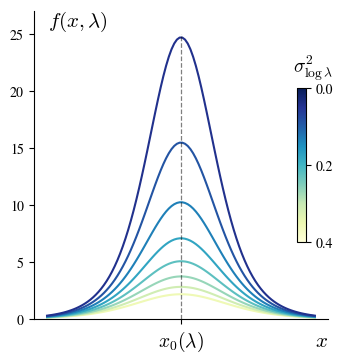

In [10]:
# Plot the function f(x,lambda) for different values of sigma2_log_lambda

fig , ax = plt.subplots(figsize=(4,4))

# Make the plots with a gradient of colors
for i , sig2 in enumerate(sig2_log):
    col = plt.get_cmap('YlGnBu')((i+1)/(len(sig2_log)+1))
    ax.plot(x,f[i],label=f'$\sigma^2 = {sig2}$',color=col,lw=1.5)

# Plot vertical line at x0 for reference
ax.vlines(0,0,25,linestyles='--',lw=0.9,alpha=0.5,colors='k')

# Plot a colorbar to relate the shades of blue with the values of sigma2_log_lambda
sm = plt.cm.ScalarMappable(cmap='YlGnBu',norm=plt.Normalize(vmin=0, vmax=0.4))
cbar = fig.colorbar(sm, ax=ax, shrink=0.5, aspect=17,pad=-0.1)
cbar.set_ticks([0,0.2,0.4],labels=['0.4','0.2','0.0'])

# Add labels and save the plot
ax.set_xticks([0],[r'$x_0(\lambda)$'],size=14)
ax.text(0.88,0.8,r'$\sigma^2_{\log\lambda}$',transform=ax.transAxes,size=14)
ax.text(0.05,0.95,r'$f(x,\boldsymbol{\lambda})$',transform=ax.transAxes,size=15)
ax.set_xlabel(r'$x$',loc='right',labelpad=-15)
ax.set_ylim(0,27)

fname = path_plot + f'f_x_lambda_J{J}_m{m}_s{s}_alpha{alpha}_beta{beta}.png'
plt.savefig(fname,bbox_inches='tight',dpi=300)

In [ ]:
# EVALUATION OF THE FUNCTION F(lambda) (equation 9 of pdf)
# FOR DIFFERENT VALUES OF mu_log_lambda and sigma2_log_lambda


# Model Parameters
J = 5
m , s = 0 , 1
alpha , beta = 1 , 1

# Define grid for marginal prior evaluation
mu_log = np.linspace(-3,3,80)
sig2_log = np.linspace(0,4,80)

# Evaluate the integral F(lambda) (eq 9 of pdf) for each value of the grid
F = np.zeros((len(mu_log),len(sig2_log)))
for i,mu in enumerate(mu_log):
    for j,sig2 in enumerate(sig2_log):
        x0 = (mu-m)/s
        w2 = 2*(beta+0.5*J*(sig2))/(J*s**2)
        F[i,j] = md.F(x0, w2, alpha, J)[0]

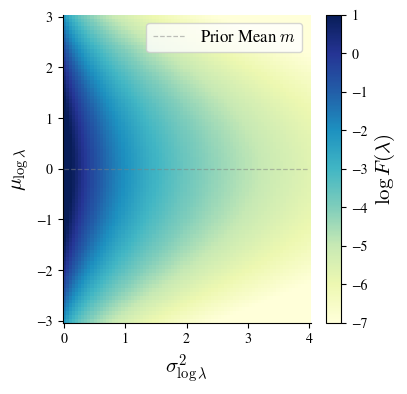

In [6]:
# Plot the function log F(lambda)
fig , ax = plt.subplots(figsize=(4,4))

# Make the plot and define colorbar
c = ax.pcolormesh(sig2_log, mu_log, np.log(F),cmap='YlGnBu',vmin=-7,vmax=1)
cbar = fig.colorbar(c, ax=ax)

# Plot the prior mean as a reference
ax.hlines(0,0,4,linestyles='--',lw=0.9,alpha=0.5,colors='gray',label=r'Prior Mean $m$')
ax.legend(fontsize=12)

# Set labels and save
ax.set_xlabel(r'$\sigma^2_{\log\lambda}$')
ax.set_ylabel(r'$\mu_{\log\lambda}$')
cbar.set_label(r'$\log F(\boldsymbol{\lambda})$')

fname = path_plot + f'log_integral_J{J}_m{m}_s{s}_alpha{alpha}_beta{beta}.png'
plt.savefig(fname,bbox_inches='tight',dpi=300)

## Sampling of the full posterior

In [8]:
# DEFINE THE HYPERPARAMETERS AND SAMPLE FROM THE BHM

# Model Parameters
J = 10                   # Number of hospitals   
m , s = 3 , 0.2               # Parameters for P(mu_0)
alpha , beta = 3 , 0.5        # Parameters for P(sigma2_0)
frequencies = [12,24,52]    # Possible reporting frequencies
seed = 2001                # Seed for reproducibility

# Get samples from the hierarchical model
ns , mu_0 , sigma2_0 , lambdas , Y = md.sample_hierarchical_model(J,frequencies,m,s,alpha,beta,seed=seed)
# Recall that for inference the only measured values are Y
# whereas mu_0, sigma2_0 and lambdas are latents

# Print the sampled configuration of the model
md.display_configuration(ns,mu_0,sigma2_0,lambdas,J,alpha,beta,m,s)

Number of Hospitals J = 10

 Prior Hyperparameters:


<IPython.core.display.Math object>

<IPython.core.display.Math object>


Reporting Frequencies:


<IPython.core.display.Math object>


Population Level Parameters:


<IPython.core.display.Math object>


Hospital Level Parameters:


<IPython.core.display.Math object>

In [24]:
# SAMPLE FROM THE FULL POSTERIOR DISTRIBUTION 
# P(theta|Y) = P(mu_0,sigma2_0,lambdas|Y)
# theta = (mu_0,sigma2_0,lambdas) are the latent variables

# Parameters of the sampler
ndim = J   # Number of latent variables (mu_0,sigma2_0,lambdas)
n_walkers = 40
burnin = 100
nsteps = 5000

# Moves allows to define the type of proposal move for the walkers 
# and can help improve the convergence and efficiency of the sampler.
moves=[(emcee.moves.DEMove(), 0.8),
       (emcee.moves.DESnookerMove(gammas=0.5), 0.2)]


# Define the log posterior function
logP = md.log_full_posterior

# Sample from the full posterior distribution
samples , acc_fraction , autocorr_time = md.emcee_sampling(n_walkers,ndim,logP,burnin,nsteps,moves,Y,ns,J,m,s,alpha,beta,show=True,full=False)


# # Since the samples are correlated we thin them
# # to reduce the correlation between samples
# thin = int(autocorr_time)
# samples = samples[::thin,:,:]

# # Finally flatten the samples
# samples = samples.reshape(-1,ndim)
# N_samples = samples.shape[0]
# print(f'\nThe effective number of samples after thinning is {N_samples = }')
# print(f'The shape of samples after thinning and flattening is {samples.shape = }')

# # Save the samples
# fname = path_data + f'samples_full_posterior_J{J}_m{m}_s{s}_alpha{alpha}_beta{beta}_seed{seed}.txt'
# np.savetxt(fname,samples)


100%|██████████| 5000/5000 [00:23<00:00, 211.26it/s]



Acceptance Ratio = 0.308
Autocorrelation Time = 31.2

Shape of the full chain samples.shape = (5000, 40, 10)


In [23]:
name = logP.__name__

if 'full' in name:
    full = True
else:
    full = False

full

True

In [27]:
time_c = emcee.autocorr.integrated_time(samples)
time_c.mean()

np.float64(31.21103342250699)

In [42]:
samples.shape
serie = samples[:,2,10]

autoc = emcee.autocorr.function_1d(serie)
time_c = emcee.autocorr.integrated_time(serie)
autoc.shape
print(time_c)

[23.35754623]


(0.0, 111.2416477546281)

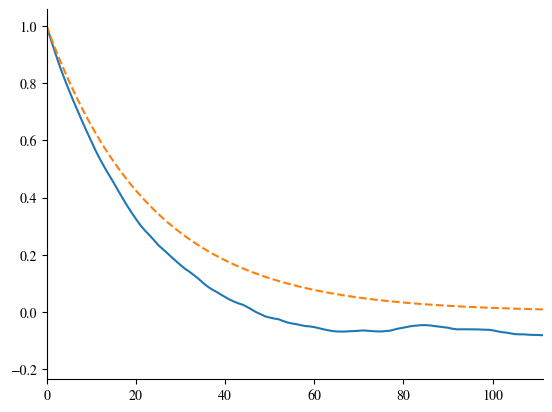

In [43]:
plt.plot(autoc)
tau = np.arange(len(autoc))
plt.plot(tau, np.exp(-tau/time_c), "--")
plt.xlim(0,3*autocorr_time)

# plt.yscale('log')	

In [44]:
from multiprocessing import cpu_count

ncpu = cpu_count()
print("{0} CPUs".format(ncpu))

8 CPUs


In [3]:
def log_prob(theta):
    t = time.time() + np.random.uniform(0.005, 0.008)
    while True:
        if time.time() >= t:
            break
    return -0.5 * np.sum(theta**2)

In [4]:
np.random.seed(42)
initial = np.random.randn(32, 5)
nwalkers, ndim = initial.shape
nsteps = 100

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob)
start = time.time()
sampler.run_mcmc(initial, nsteps, progress=True)
end = time.time()
serial_time = end - start
print("Serial took {0:.1f} seconds".format(serial_time))

100%|██████████| 100/100 [00:25<00:00,  3.86it/s]

Serial took 26.1 seconds


In [5]:
from multiprocessing import Pool

In [6]:
with Pool() as pool:
    sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob, pool=pool)
    start = time.time()
    sampler.run_mcmc(initial, nsteps, progress=True)
    end = time.time()
    multi_time = end - start
    print("Multiprocessing took {0:.1f} seconds".format(multi_time))
    print("{0:.1f} times faster than serial".format(serial_time / multi_time))

: 

In [25]:
# Load the samples
fname = path_data + f'samples_full_posterior_J{J}_m{m}_s{s}_alpha{alpha}_beta{beta}_seed{seed}.txt'
samples = np.loadtxt(fname)
print(f'{samples.shape = }')

samples.shape = (17040, 12)


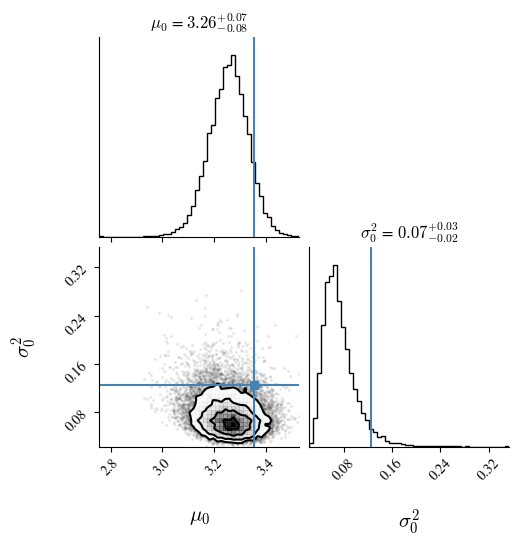

In [26]:
# MAKE CORNER PLOT FIRST OF mu_0 AND sigma2_0

# Unpack the first two dimensions of the samples
samples_populations = samples[:,:2]

# Define labels for the corner plot
labels = [r'$\mu_0$',r'$\sigma^2_0$']

# Make the corner plot
fig = corner.corner(samples_populations, bins=50,
                    labels=labels,show_titles=True,title_kwargs={"fontsize": 12},truths=[mu_0,sigma2_0])



In [252]:
print(ns)
print(lambdas)

[12 12 12 12 12 24 24 52 52 52]
[22.36457085 20.24638036 18.85573612 31.63408073 15.06508658 27.78783997
 55.93555103 25.13600035 35.07331124 34.93319951]


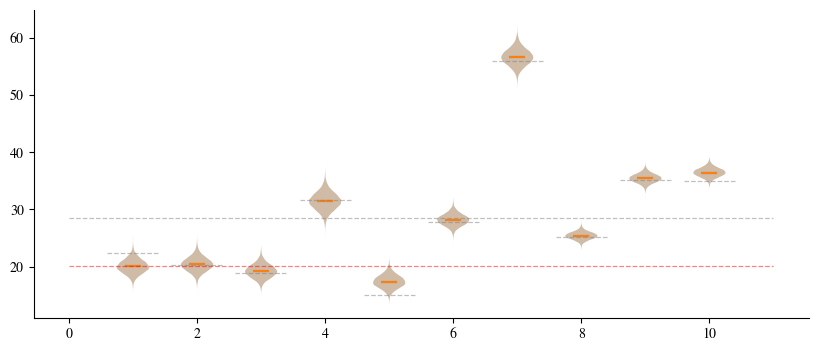

In [15]:
# Violin plot of the posterior distribution of the hospital level variables
# Unpack the first two dimensions of the samples
samples_hospitals = samples[:,-J:]

fig , ax = plt.subplots(1,1,figsize=(10,4))
ax.violinplot(samples_hospitals,showmeans=True,showextrema=False)
ax.violinplot(samples_hospitals,showmeans=True,showextrema=False)
for j in range(J): 
    lambda_j = lambdas[j]
    ax.hlines(lambda_j,j+1-0.4,j+1+0.4,linestyles='--',lw=0.9,alpha=0.5,colors='gray')

ax.hlines(np.exp(mu_0),0,J+1,linestyles='--',lw=0.9,alpha=0.5,colors='gray')
ax.hlines(np.exp(m),0,J+1,linestyles='--',lw=0.9,alpha=0.5,colors='red')
plt.show()

## Sample the marginal posteriors

In [264]:
importlib.reload(md)

<module 'Module' from 'c:\\Users\\crise\\OneDrive - SISSA\\Documents\\SISSA\\SISSA 1st YEAR\\Bayesian Inference I\\Exam\\Module.py'>

In [ ]:
# SAMPLE FROM THE MARGINAL POSTERIOR DISTRIBUTION WITH POOLING
# P(lambdas|Y) 

# Parameters of the sampler
ndim = J 
n_walkers = 40
burnin = 1#2000
nsteps = 2000

# Initial point for the sampler obtained from prior in BHM
lambdas_0 = md.get_sample_prior_model(m,s,alpha,beta,J,n_walkers)[:,-J:]

# Initialize the Sampler
sampler = emcee.EnsembleSampler(n_walkers, ndim, 
                                md.log_marginal_posterior_pooling, 
                                args=[Y,ns,J,m,s,alpha,beta],
                                moves=[  (emcee.moves.DEMove(), 0.8),
                                        (emcee.moves.StretchMove(a=2.5), 0.2)])
# moves allows to define the type of proposal move for the walkers 
# and can help improve the convergence and efficiency of the sampler. emcee.moves.StretchMove(a=2.5)) GaussianMove(cov=3.0)

# Run the sampler for the burn-in period and restart it
state = sampler.run_mcmc(lambdas_0, burnin, progress=True)
sampler.reset()

# Run the sampler for the production period
state = sampler.run_mcmc(state, nsteps, progress=True)

# # Retrieve information about the sampler
# acc_fraction = np.mean(sampler.acceptance_fraction)
# autocorr_time = np.mean(sampler.get_autocorr_time())
# print(f'\nAcceptance Ratio = {acc_fraction:.3}')
# print(f'Autocorrelation Time = {autocorr_time:.3}')

# # Collect the samples from the chain
# samples = sampler.get_chain(flat=False)
# print(f'\nShape of the full chain {samples.shape = }')

# # Since the samples are correlated we thin them
# # to reduce the correlation between samples
# thin = int(autocorr_time)
# samples = samples[::thin,:,:]

# # Finally flatten the samples
# samples = samples.reshape(-1,ndim)
# N_samples = samples.shape[0]
# print(f'\nThe effective number of samples after thinning is {N_samples = }')
# print(f'The shape of samples after thinning and flattening is {samples.shape = }')

# Save the samples
# fname = path_data + f'samples_marginal_posterior_pooling_J{J}_m{m}_s{s}_alpha{alpha}_beta{beta}.txt'
# np.savetxt(fname,samples)

100%|██████████| 2000/2000 [23:07<00:00,  1.44it/s]  
